## Lab 3 - Classification 

In this lab we experiment with a few classification algorithms using Scikitslearn's data. 

In [20]:
# import the necessary packages
import numpy as np
import pandas as pd
import pylab as pl
import matplotlib.pyplot as plt
from sklearn import datasets, utils
from sklearn.model_selection import train_test_split
%matplotlib inline

### Part I. Data loading and visualization
First we load in our dataset, "breast cancer", using ScikitLearn's datasets utilities:

In [3]:
dataset = datasets.load_breast_cancer()
X = dataset.data
y = dataset.target

In [4]:
np.c_[dataset['data'], dataset['target']]

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 4.601e-01, 1.189e-01,
        0.000e+00],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 2.750e-01, 8.902e-02,
        0.000e+00],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 3.613e-01, 8.758e-02,
        0.000e+00],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 2.218e-01, 7.820e-02,
        0.000e+00],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 4.087e-01, 1.240e-01,
        0.000e+00],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 2.871e-01, 7.039e-02,
        1.000e+00]])

In [5]:
df = pd.DataFrame(columns=dataset['feature_names'], data=dataset['data'])
df['Target'] = dataset['target']
df.head(20)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678,0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440,0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368,0
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510,0
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720,0
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750,0


Now X and y contains the data we want to use for classification experiments. 

As we did in Lab 2, we check out the attribute names of the dataset:

In [6]:
dataset['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='|S23')

For your information, these features are extracted through image analysis of breast mass pictures obtained through fine needle aspirate. 
You can find out more about the dataset from the UCI machine learning repository page https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic).

You can check out the shape of the X and y arrays:

In [7]:
print X.shape
print y.shape

(569, 30)
(569,)


The following line checks out the data lines that correspond to the '1' label (in y), and display them using the first two attributes. 

/home/yohanderose/.conda/envs/info204/lib/python2.7/site-packages/matplotlib/legend.py:938: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x7f8509476710>] instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)
/home/yohanderose/.conda/envs/info204/lib/python2.7/site-packages/matplotlib/legend.py:938: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x7f8509476d50>] instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)


<function matplotlib.pyplot.show>

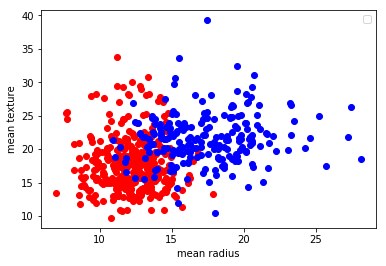

In [8]:
X1=X[y==1]  # Get all X samples corresponding to "1" class label
one = pl.plot(X1[:,0],X1[:,1],'ro')   # pick first two columns to visualize
pl.xlabel(dataset['feature_names'][0])  # display attribute names as the figure's x-y labels
pl.ylabel(dataset['feature_names'][1]);
# your code for Task 1 - extract "X0" and plot it out using the same attribute choices
df0 = df.loc[df['Target']==0]
zero = pl.plot(df0['mean radius'], df0['mean texture'], 'bo')
pl.legend([one, zero], ['Malignant', 'Benign'], loc='best')
pl.show

In [9]:
print len(df.loc[df['Target'] == 0]), len(df.loc[df['Target'] == 1])

212 357


**Task 1: ** Complete the code in the cell above so that it also plots all the data points with the '0' class label. To do this, extract all the 0-samples into X0, and plot them using a 'b+' key (instead of 'ro'). 

Are the two classes linearly seperable? Play with other attribute selections if you like. 

## Part II. k-Nearest Neighbour

Now we import the k-NN classifier from Sklearn and try it out with k=3:

In [15]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X, y)    # training
neigh.score(X, y)  # testing

0.9560632688927944

The k-NN classifier scores quite well. How about we change the k value? Try the range [1,50] and get the scores added into the 'perf' list:

In [16]:
# TO-DO: 
perf=[]
for k in range(1,51):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X, y)
    perf.append(model.score(X, y))

In [17]:
perf

[1.0,
 0.968365553602812,
 0.9560632688927944,
 0.9472759226713533,
 0.9472759226713533,
 0.9420035149384886,
 0.9437609841827768,
 0.9384885764499121,
 0.9420035149384886,
 0.9420035149384886,
 0.9402460456942003,
 0.9384885764499121,
 0.9384885764499121,
 0.9384885764499121,
 0.9402460456942003,
 0.9402460456942003,
 0.9349736379613357,
 0.9314586994727593,
 0.9332161687170475,
 0.9367311072056239,
 0.9314586994727593,
 0.9314586994727593,
 0.929701230228471,
 0.9332161687170475,
 0.929701230228471,
 0.929701230228471,
 0.9314586994727593,
 0.9314586994727593,
 0.9314586994727593,
 0.9314586994727593,
 0.9279437609841827,
 0.929701230228471,
 0.9261862917398945,
 0.9279437609841827,
 0.9261862917398945,
 0.9261862917398945,
 0.9279437609841827,
 0.9261862917398945,
 0.9244288224956063,
 0.9244288224956063,
 0.9209138840070299,
 0.9244288224956063,
 0.9191564147627417,
 0.9226713532513181,
 0.9226713532513181,
 0.9244288224956063,
 0.9244288224956063,
 0.9244288224956063,
 0.926186291

Plot out the perf list to view the trend. 

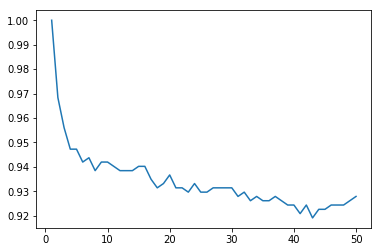

In [18]:
pl.plot(range(1,51), perf);

Of course, to properly assess the learning outcome of our model, training-and-testing on the same dataset does not make much senese. The following code splits the X,y data into two sets for training and testing respectively. We use the first 4/5 for training, the rest for testing:

In [ ]:
# cut=X.shape[0]*4/5          # get the splitting position
# X_tr=X[:cut]; y_tr=y[:cut]  # split
# X_te=X[cut:]; y_te=y[cut:]

In [24]:
#I'm going to try matplotlibs train_test_split()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)  #.2 or 1/5 of the data will be for testing

** Task 2: ** Try k in range [1,50]. Use X_tr for training, and X_te for testing. Collect scores for both (X_tr, y_tr) and (X_te, y_te) pairs. Display the score lists in one plot.  

/home/yohanderose/.conda/envs/info204/lib/python2.7/site-packages/matplotlib/legend.py:938: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x7f8503ff8190>] instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)
/home/yohanderose/.conda/envs/info204/lib/python2.7/site-packages/matplotlib/legend.py:938: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x7f8503fc9410>] instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)


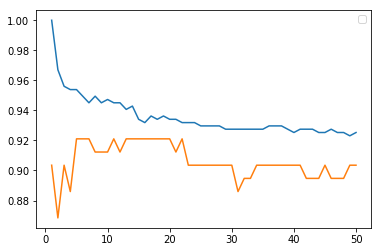

In [28]:
scores_tr=[]
scores_te=[]
# your code ...
for k in range(1,51):
    model = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
    scores_tr.append(model.score(X_train, y_train))
    scores_te.append(model.score(X_test, y_test))

train = pl.plot(range(1,51), scores_tr)
test = pl.plot(range(1,51), scores_te)
pl.legend([train,test], ["Train","Test"])

** TO-DO: ** Comment on the score trend and suggest a suitable choice of $k$:
* Your comments - So k is too generalised at the lower end <5 and too specific to the training data >20

## Part III. Decision Tree

Finally, let's experiment with the Decision Tree algorithm. First, import the classifier:

In [29]:
from sklearn.tree import DecisionTreeClassifier

The following code builds a tree, fits it with the training data, and reports the performance on both the training data and testing data:

In [59]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)    # as always, fit() for training
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))   # test on training data
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))       # test on testing data 

Accuracy on training set: 1.000
Accuracy on test set: 0.895


** Task 3: ** Read the DT classifier <a href="http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html" target="_blank">documentation</a>  (page opens in a new Tab) and add an optional setting of max_depth=4; redo the training/testing as above:

In [60]:
# Your code ...
tree = DecisionTreeClassifier(max_depth=4)
tree.fit(X_train, y_train)    # as always, fit() for training
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))   # test on training data
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))       # test on testing data 

Accuracy on training set: 0.989
Accuracy on test set: 0.886


** TO-DO **: Comment on the changes of scores, if any:
- Small drop in training accuracy and small rise in testing accuracy

To visualize the trees, we need to use another package called 'graphviz'. We store information such as the attribute names etc. and save the decision tree into a .dot file for later visualization:

In [61]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"],
    feature_names=dataset.feature_names, impurity=False, filled=True)

In [63]:
import graphviz
f = open("tree.dot")
dot_graph = f.read()
display(graphviz.Source(dot_graph)) 

ImportError: No module named graphviz

** Extra task: ** Visualize and compare the two trees (with and without specifying max_depth). 

**END of Lab 3**